In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 為了處理方便，把 'train.csv' 和 'test.csv' 合併起來，'test.csv'的 Weather 欄位用 0 補起來。
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))

# 以 train_end_idx 作為 'train.csv' 和 'test.csv' 分界列，
train_end_idx = len(df)
df = pd.concat([df, df_test], sort=False)

nan
nan
3314.0


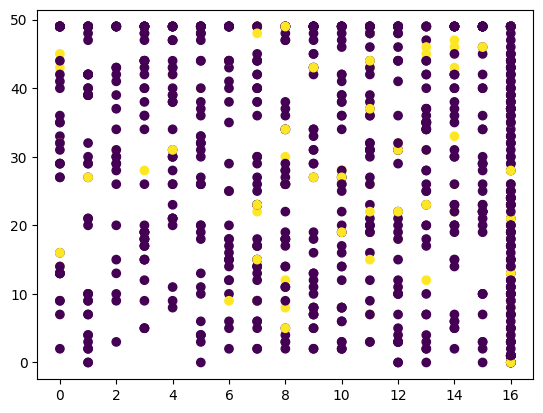

In [3]:
## 將非數值欄位拿掉
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# print(df.head(10))

print(df['Date'].values[4])
# df['Date'] = df['Date'].astype(str).str.split('/', n = 1).str.get(1)
print(df['Date'].values[4])
df['Date'] = labelencoder.fit_transform(df['Date']).astype(float)
print(df['Date'].values[4])
df['Loc'] = labelencoder.fit_transform(df['Loc']).astype(float)
df['WindDir'] = labelencoder.fit_transform(df['WindDir']).astype(float)
df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir']).astype(float)
df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir']).astype(float)
# df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object_])

# Date Loc TempLow TempHigh Steaming Sun WindDir WindSpeed DayWindDir NightWindDir DayWindSpeed NightWindSpeed DayHumidity 
# NightHumidity DayPressure NightPressure DayCloud NightCloud DayTemp NightTemp Weather RISK_MM
import matplotlib.pyplot as plt
plt.scatter(df['WindDir'].values[:1000], df['Loc'].values[:1000], c= df['Weather'].values[:1000])
plt.show()

# 將 missing value 補 0
for col in df.columns:
    if col not in ['Date', 'Loc', 'WindDir', 'DayWindDir', 'NightWindDir']:
        df[col] = df[col].fillna(df[col].median())
        # print(col)
        # print(df[col].dtype)
    else:
        df[col] = df[col].fillna(df[col].mean())
        # print(col)
        # print(df[col].dtype)

# train

In [4]:
from sklearn.model_selection import train_test_split

# X: det_lables, y: sol_lables
X = df.drop(columns = ['Weather']).values[:train_end_idx, :]
y = df['Weather'].values[:train_end_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# print(X_train[0])

test = df.drop(columns = ['Weather']).values[train_end_idx:, :]

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

from sklearn.preprocessing import normalize, StandardScaler

# X_train = normalize(X_train)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
test_std = sc.transform(test)
model_std = SVC(kernel='rbf', C=2, random_state=0, probability=True)
model_std.fit(X_train_std, y_train)

#train tree model
# model = LogisticRegression(solver='newton-cholesky', max_iter=1000000, random_state=120)
# model = SVC(kernel='rbf', C=2, random_state=0, probability=True)
# model.fit(X_train, y_train)

y_pred_decision = model_std.predict(X_test_std)

# y_pred_ustd = model.predict(X_test)
# y_predprob_ustd = model.predict_proba(X_test)
# y_predprob_po_ustd = y_predprob_ustd[:,1]

# fpr, tpr, thres = roc_curve(y_test, y_predprob_po_std)
# roc_auc = auc(fpr, tpr)
# fpr_ustd, tpr_ustd, thres_ustd = roc_curve(y_test, y_predprob_po_ustd)
# roc_auc_ustd = auc(fpr_ustd, tpr_ustd)

# predict
# y_pred_decision = model.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))

# plt.title('ROC')
# plt.plot(fpr, tpr, 'b', label='std = %0.2f'% roc_auc)
# plt.plot(fpr_ustd, tpr_ustd, 'g', label='ustd = %0.2f'% roc_auc_ustd)
# plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], color='r=', linearstyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

Accuracy: 0.807025
f1-score: 0.377808


In [6]:
ans_pred = model_std.predict(test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')